In [1]:
#Testing Pyspark Installation
import findspark
findspark.init()
import pyspark

## Initializing Pyspark

In [2]:
#intialize Spark Context
#from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
spark= SparkSession.builder.appName('Regression Analyzation').getOrCreate()
spark


In [3]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
plants = pd.read_csv('/Users/Asus/Documents/InternCsv/InternCsvfinal_dispatch(Act).csv')

In [5]:
plants.describe

<bound method NDFrame.describe of        Unnamed: 0          Plant       Date   Time  Dispatch
0               0         Canyon   7/1/2020   0:00        20
1               1            WPS   7/1/2020   0:00         0
2               2           Olax   7/1/2020   0:00        10
3               3           Nlax   7/1/2020   0:00        39
4               4           Polp   7/1/2020   0:00        39
...           ...            ...        ...    ...       ...
46459       44779  VPOWER Palle.  7/29/2020  23:30         0
46460       44780   VPOWER Galle  7/29/2020  23:30         0
46461       44781  VPOWER Horona  7/29/2020  23:30         0
46462       44782   ALTAQQA-Pol.  7/29/2020  23:30         0
46463       44783  ALTAQQA-Mahi.  7/29/2020  23:30         0

[46464 rows x 5 columns]>

In [6]:
plants.head(5)

,Unnamed: 0,Plant,Date,Time,Dispatch
0,0,Canyon,7/1/2020,0:00,20
1,1,WPS,7/1/2020,0:00,0
2,2,Olax,7/1/2020,0:00,10
3,3,Nlax,7/1/2020,0:00,39
4,4,Polp,7/1/2020,0:00,39


In [7]:
plants = plants.rename(columns={'Unnamed: 0': 'Plant1'})


In [10]:
plants.drop('Plant1',axis=1,inplace=True)

In [11]:
plants.head(5)

,Plant,Date,Time,Dispatch
0,Canyon,7/1/2020,0:00,20
1,WPS,7/1/2020,0:00,0
2,Olax,7/1/2020,0:00,10
3,Nlax,7/1/2020,0:00,39
4,Polp,7/1/2020,0:00,39


In [15]:
plants.dtypes


Plant       object
Date        object
Time        object
Dispatch     int64
dtype: object

In [12]:
X = plants.iloc[:, 0:2].values  
y = plants.iloc[:, 3].values 

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [16]:
from datetime import datetime

In [17]:
plants['Date'] = pd.to_datetime(plants['Date'])

In [18]:
plants.dtypes

Plant               object
Date        datetime64[ns]
Time                object
Dispatch             int64
dtype: object

## Pyspark Dataframe Manipulation

In [19]:
import pyspark
from pyspark.sql import SparkSession

#main1.printSchema()
from pyspark.sql.functions import col
plants_final = spark.createDataFrame(plants)
plants_final

DataFrame[Plant: string, Date: timestamp, Time: string, Dispatch: bigint]

In [20]:
from pyspark.sql.functions import col

In [21]:
plants_final_new = plants_final.groupBy(["Plant","Date","Time"]).sum("Dispatch").sort(col("Date").asc(),col("Time").asc())

In [22]:
plants_final_new.show(4)

+------+-------------------+----+-------------+
| Plant|               Date|Time|sum(Dispatch)|
+------+-------------------+----+-------------+
| Barge|2020-07-01 00:00:00|0:00|           90|
|Canyon|2020-07-01 00:00:00|0:00|           20|
|LVPS 3|2020-07-01 00:00:00|0:00|          540|
|   Sam|2020-07-01 00:00:00|0:00|            0|
+------+-------------------+----+-------------+
only showing top 4 rows



In [39]:
plant_show=plants_final_new.groupby('Plant').sum()

In [40]:
plant_show.printSchema

<bound method DataFrame.printSchema of DataFrame[Plant: string, sum(sum(Dispatch)): bigint]>

In [47]:
from pyspark.sql.functions import *
plantNew=plant_show.select(col("Plant"),\
                  col("sum(sum(Dispatch))").alias("DisPatch"))
plantNew.printSchema()

root
 |-- Plant: string (nullable = true)
 |-- DisPatch: long (nullable = true)



In [53]:
plant_Dispatch=plantNew.sort(col("DisPatch").desc())


In [54]:
plant_Dispatch.show(10)

+----------+--------+
|     Plant|DisPatch|
+----------+--------+
|    LVPS 1|  702469|
|    LVPS 2|  695219|
|    LVPS 3|  688639|
|       WCP|  542372|
|  ACE EMBP|  173418|
|    Sapu B|  150106|
|Sojitz CCP|  138635|
|     Barge|  136623|
|      Nlax|  125595|
|    Sapu A|  105651|
+----------+--------+
only showing top 10 rows



## Plotting Plant vs Dispatch Values

In [55]:
PandaDF=plant_Dispatch.toPandas()

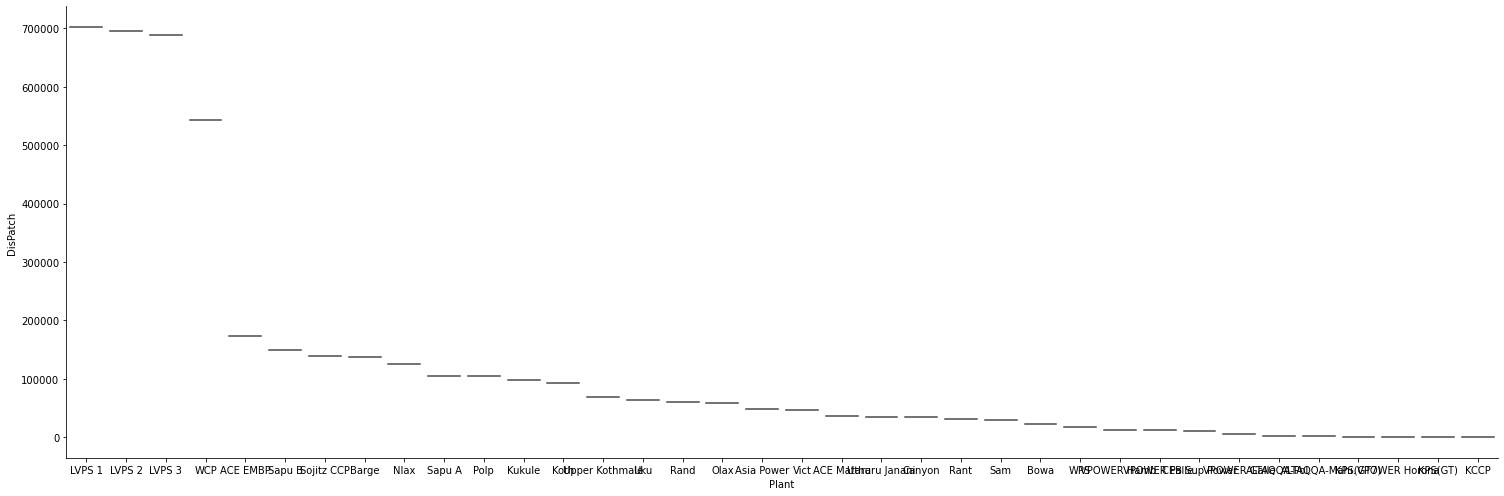

In [66]:
# From graph we can see that Plants Dispatches in July
import matplotlib.pyplot as plt
import seaborn as sns
# Plant vs Dispatch
sns.catplot(y = "DisPatch", x = "Plant", data = PandaDF.sort_values("DisPatch", ascending = False), kind="boxen", height = 7, aspect = 3)
plt.show(10)


In [57]:
PandaDF.to_csv(r'/Users/Asus/Documents/InternCsv/JulyDispatch_Sum(Actual).csv',index=True,header=True)